In [4]:
import pandas as pd

df = pd.read_csv("CAR DETAILS.csv")
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner


In [5]:
# View the shape and info of the dataset
row, col = df.shape
print('Row=', row, 'Col=', col)
df.info()

Row= 4340 Col= 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# Split the column name to get the model of the car
df["model"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
df['model'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: model, dtype: int64

In [7]:
# Check null values in dataset
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
model            0
dtype: int64

In [9]:
# Check duplicated row in dataset
df[df.duplicated()]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner,Mahindra
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner,Maruti
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner,Datsun
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner,Renault


In [12]:
# Drop all duplicated row
df = df.drop_duplicates()
df.shape

(3577, 9)

In [13]:
#To get the column types
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
model            object
dtype: object

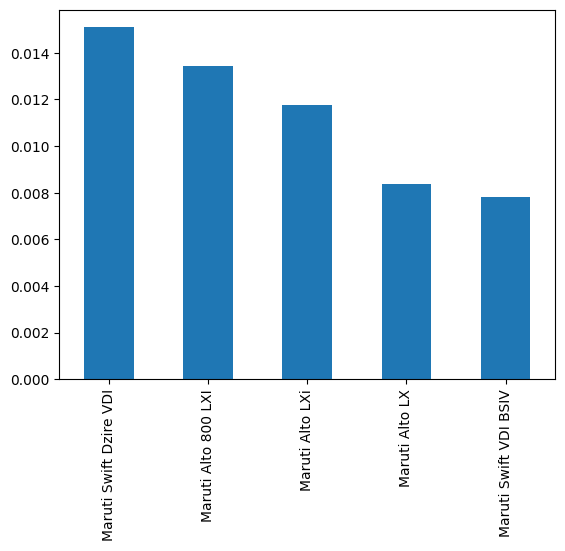

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we use (value_counts) to know to know the sold numbers of each car use (plot) to draw the graph
df["name"].value_counts(normalize = True)[:5].plot(kind = 'bar')
plt.show()


In [16]:
#add new coulmn by brand name split first part
df["brand"] = df.name.apply(lambda x : ' '.join(x.split(' ')[:1])) #Cuts first word only(car brand)from name column
df['brand'] # New column review

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: brand, Length: 3577, dtype: object

In [17]:
#To know countnvalue in coulmn
df.brand.value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64

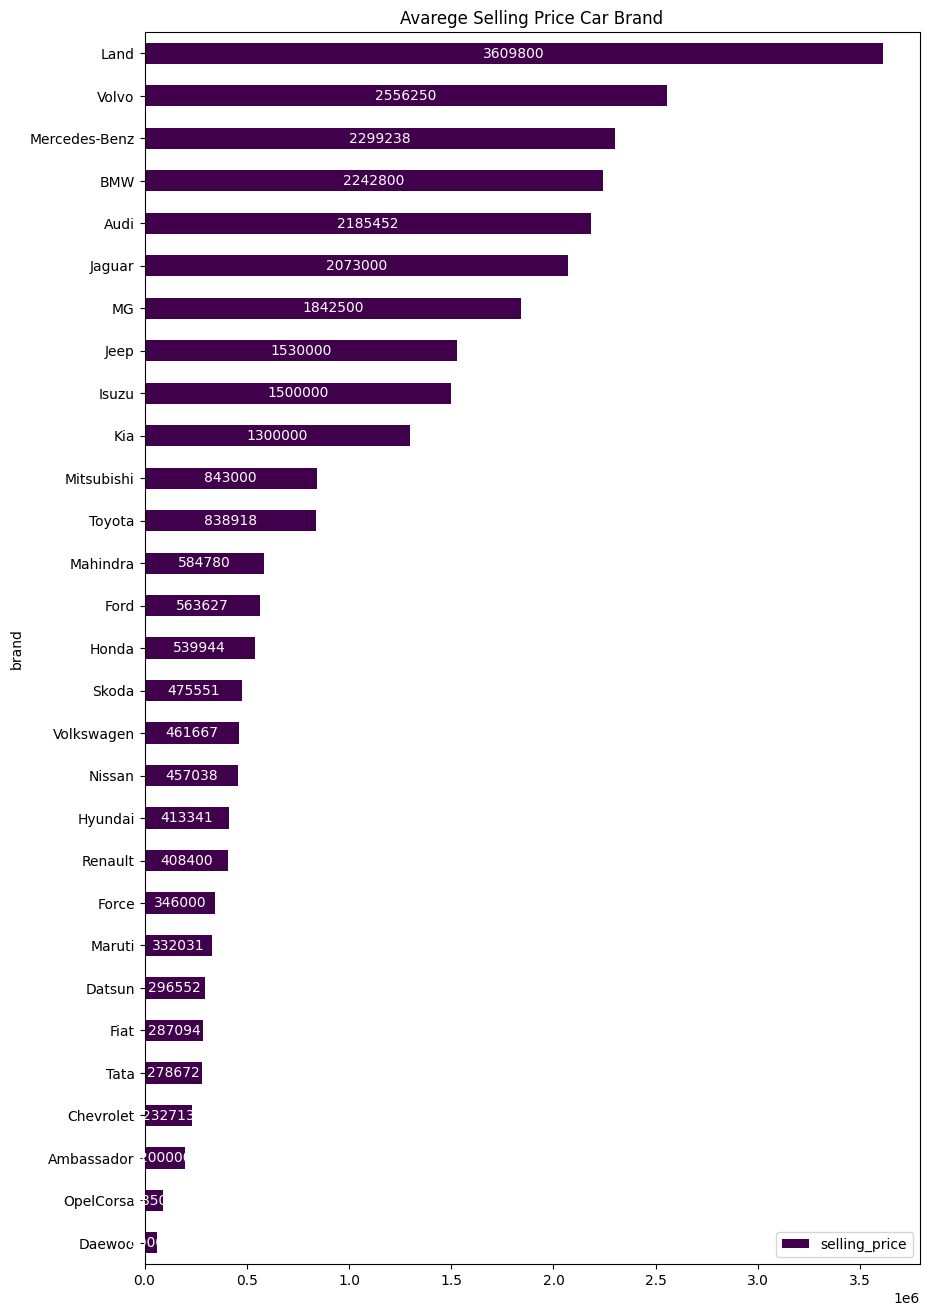

In [18]:
#we use groupby and mean to extract values and plot to draw the graph
price = df.groupby(['brand'])[['selling_price']].mean()
price.sort_values(by='selling_price', ascending=True, inplace=True)
ax   = price.plot(kind='barh', cmap='PRGn' , figsize=(10,16) ,title= 'Avarege Selling Price Car Brand')
for c in ax.containers:
        # set the bar label
    ax.bar_label(c, fmt='%.0f',label_type='center', color='w',rotation=0)

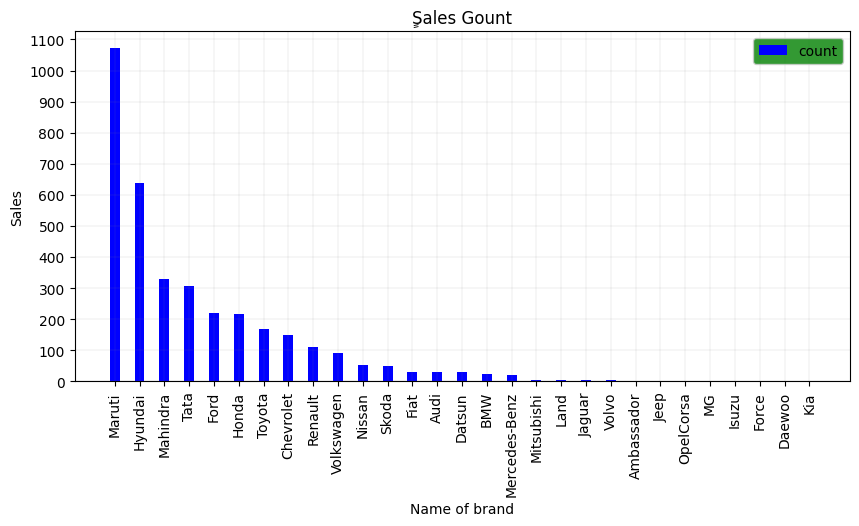

In [39]:
# We will display sales by count and value in separate graphs

#plot 1:
data = df.groupby(['brand'])['brand'].count().sort_values(ascending=False) #to extract the count
x = data.index # to extract the brand name
y = data.values # to extract the count to brand
plt.subplot(2, 1, 1)#The location of the first graph 2 1 1
#the figure has 2 row, 1 columns, and this plot is the first plot.
plt.bar(x, y, color ='blue',width = 0.4)#Fomat to plt.bar
plt.rcParams['axes.facecolor'] = '#FFFFFF'#background color
plt.xticks(rotation=90) #Make the text of the label Make the text of the label at  angle 90
plt.xlabel("Name of brand",fontsize=10,color="black")#Fomat and name to x
plt.ylabel("Sales",fontsize=10,color="black")#Fomat and name to y
plt.title("ٍSales Gount",color="black")#Fomat and name to title
plt.legend(["count"], loc ="upper right" ,facecolor='green', labelcolor='black')#Fomat and name to legend
plt.rcParams['figure.figsize'] = [10, 10]#Determine the size of the graph
plt.grid(color='grey', linestyle='-', linewidth=.1)#Fomat grid network that appears in graph background
#plt.xlim([0, 1]) #
#plt.ylim([0, 2000])#
#plt.locator_params(axis='x', nbins=20)#
plt.locator_params(axis='y', nbins=20)# to make y texts 100-200-300-- like that


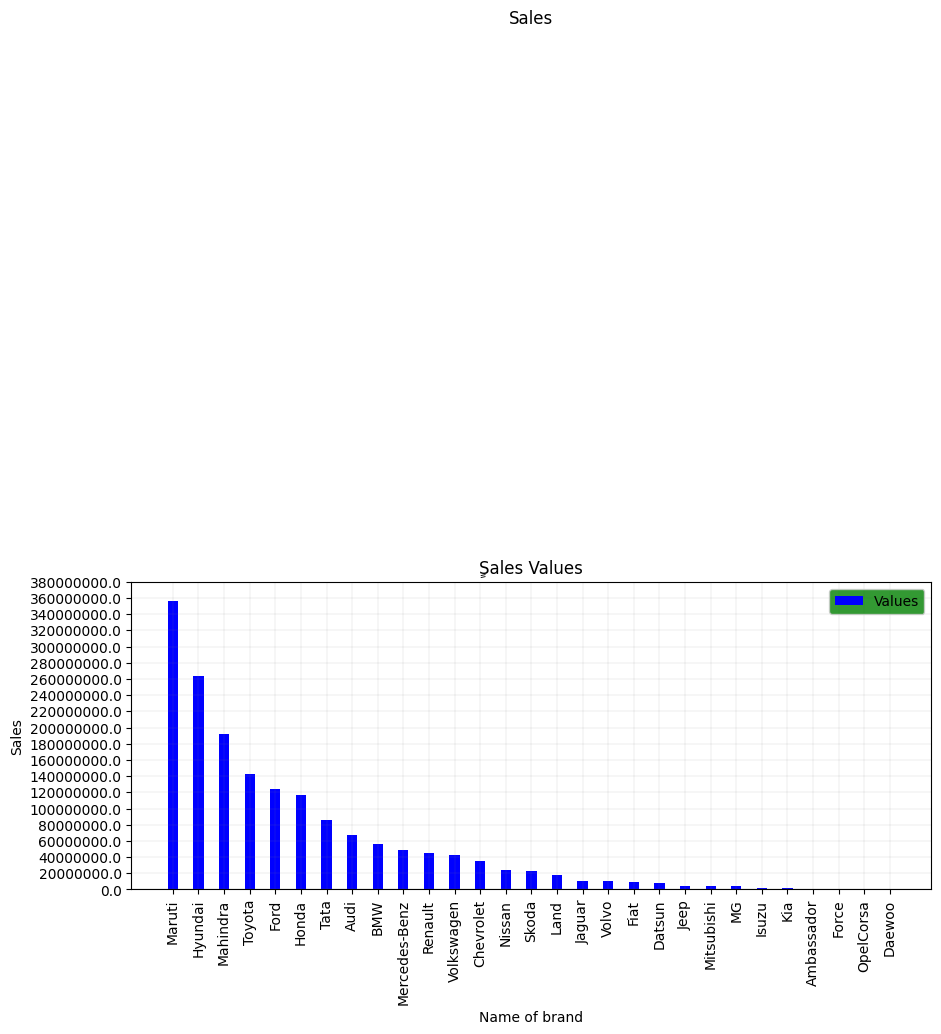

In [40]:
# We will display sales by count and value in separate graphs

#plot 2:
plt.subplot(2, 1, 2)#The location of the second graph 2 1 2
#the figure has 2 row, 1 columns, and this plot is the second plot.
data = df.groupby(['brand'])['selling_price'].sum().sort_values(ascending=False)
x = data.index # to extract the brand name
y = data.values #to extract the sum to brand
plt.bar(x, y, color ='blue',width = 0.4)
plt.rcParams['axes.facecolor'] = '#FFFFFF'
plt.xticks(rotation=90)
plt.xlabel("Name of brand",fontsize=10,color="black")
plt.ylabel("Sales",fontsize=10,color="black")
plt.title("ٍSales Values",color="black")
plt.legend(["Values"], loc ="upper right" ,facecolor='green', labelcolor='black')
plt.rcParams['figure.figsize'] = [10, 10]
plt.grid(color='grey', linestyle='-', linewidth=.1)
#plt.xlim([0, 1])
#plt.ylim([0, 2000])
#plt.locator_params(axis='x', nbins=20)
plt.locator_params(axis='y', nbins=20)
#plt.margins(x=0, y=0)
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0])# Show real values,numbers big without it appear short
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,top=0.9,wspace=0.5, hspace=0.6)# set the spacing between subplots
plt.suptitle("Sales")#Name for the whole graph
plt.show()#view


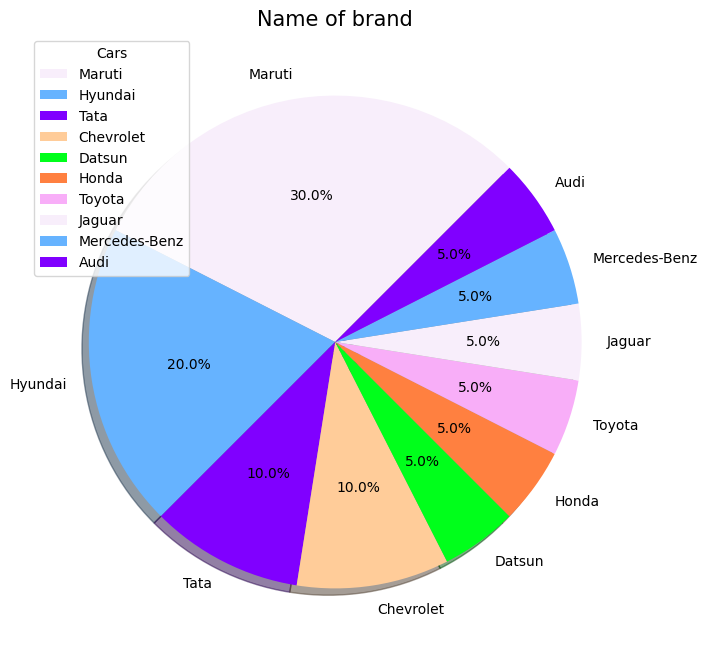

In [41]:
# We will display sales by count in pie graphs
labels = df["brand"][:20].value_counts().index #We chose only twenty
sizes = df["brand"][:20].value_counts() # We chose only twenty
data = df.groupby(['brand'])['brand'].count().sort_values(ascending=False)#to extract the count
x = data.index #to extract the brand name
y = data.values#to extract the count to brand
colors = ['#F8EEFB','#66b3ff','#8000FF','#ffcc99',"#00FF1B","#FF8040","#F8AEF8"]#color choice
plt.figure(figsize = (8,8))#Determine the size of the graph
# Creating explode data
#explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)#Fomat pie
plt.title('Name of brand',color = 'black',fontsize = 15)#Fomat title
#plt.legend()#
plt.legend(title = "Cars")#title legend
#plt.legend(wedges, cars, title ="Cars",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
#myexplode = [0.2, 0, 0, 0]
plt.show()#view


In [28]:
#To know countnvalue in year coulmn
df.year.value_counts()

2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     93
2005     61
2020     45
2004     38
2003     22
2002     18
2001     16
2000     12
1998      9
1999      9
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

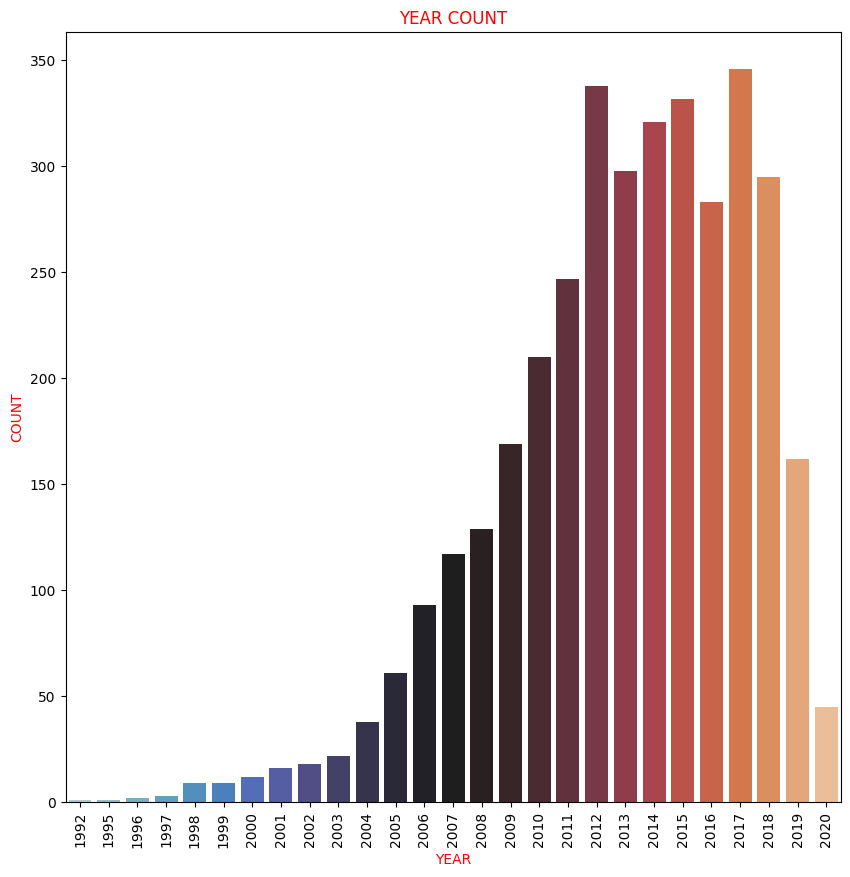

In [29]:
#Here I am using another way to display the graph by seaborn we imported it in the beginning
sns.countplot(data=df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("YEAR COUNT",color="RED")
plt.show()

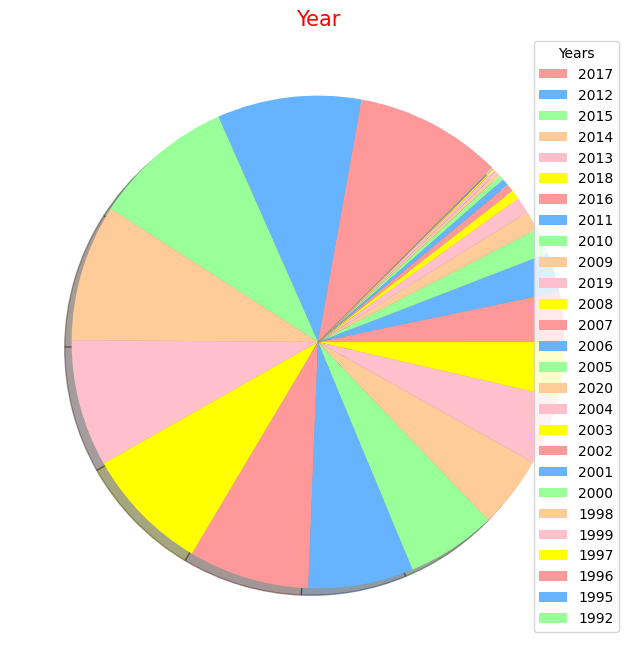

In [30]:
#We will display pie graphs
labels = df["year"].value_counts().index
sizes = df["year"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels , rotatelabels=False, autopct=None,colors=colors,shadow=True, startangle=45, labeldistance=None)
plt.title('Year',color = 'red',fontsize = 15)
plt.legend(title = "Years", loc='upper right')#title legend
plt.show()

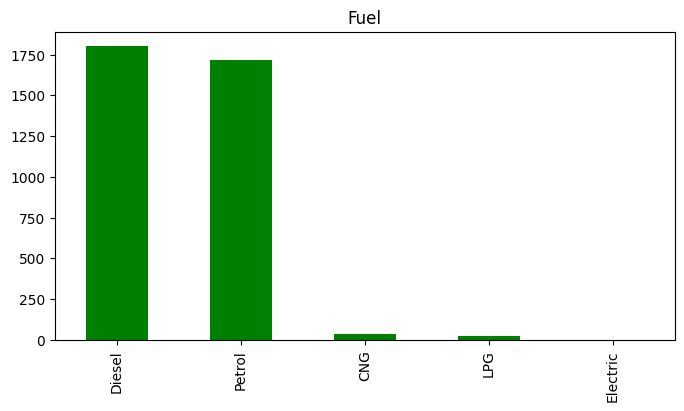

In [31]:
#We will display bar graphs
df["fuel"].value_counts(sort =True).plot(kind="bar", color=["green"], figsize=(8, 4) , title='Fuel');

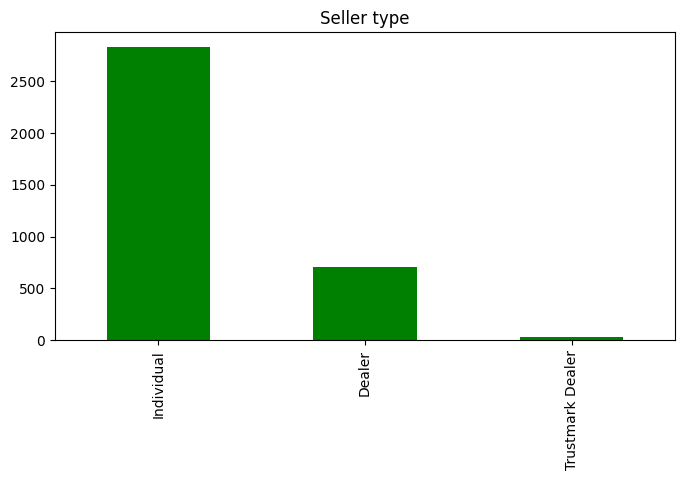

In [32]:
#We will display bar graphs
df["seller_type"].value_counts(sort = True).plot(kind="bar", color=["green"], figsize=(8, 4) , title='Seller type');

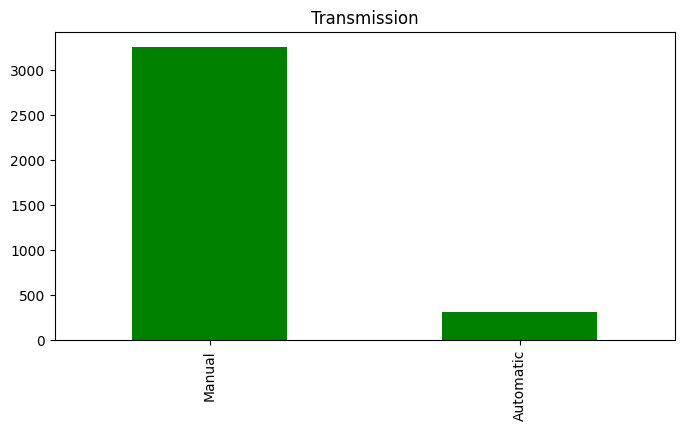

In [33]:
#We will display bar graphs
df["transmission"].value_counts(sort = True).plot(kind="bar", color=["green"], figsize=(8, 4) , title='Transmission');

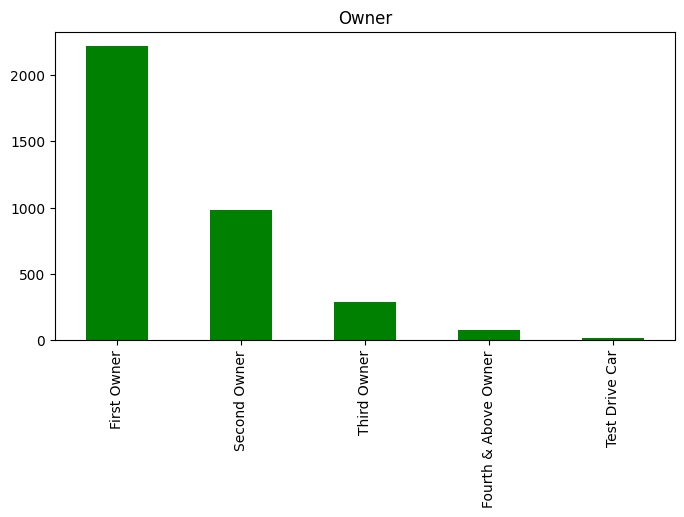

In [34]:
#We will display bar graphs
df["owner"].value_counts(sort = True).plot(kind="bar", color=["green"], figsize=(8, 4) , title='Owner');

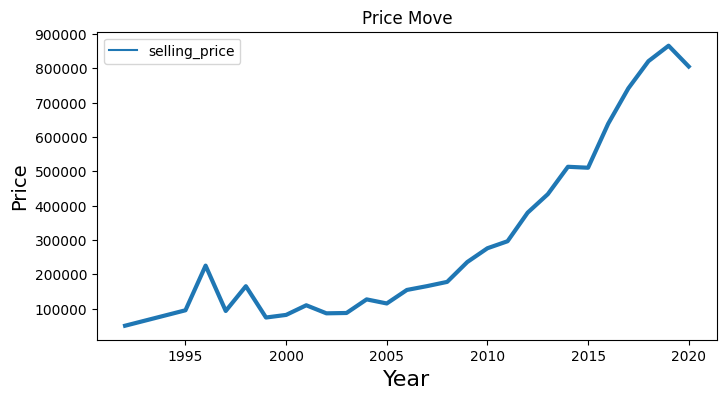

In [35]:
#We will display bar graphs line
def line_plot(data, title ,xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=data , palette="tab10", linewidth=3.0)
    plt.title(title, fontsize=12)
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=16)

df_price_move = df.groupby(['year'])[['selling_price']].mean()
line_plot(df_price_move,'Price Move', 'Year', "Price")

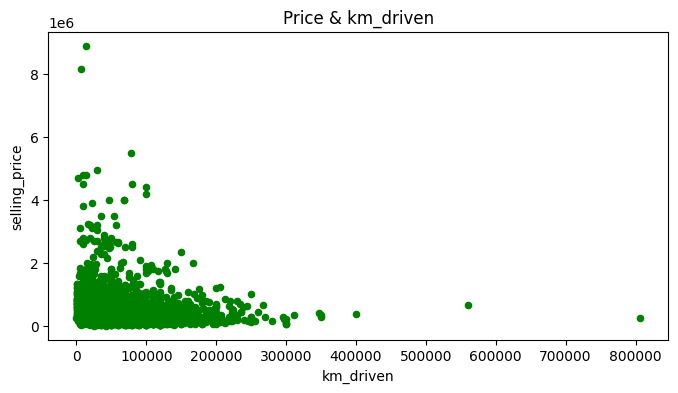

In [36]:
#We will display bar graphs scatter
df.plot(x="km_driven", y="selling_price", kind="scatter", figsize=(8, 4), title="Price & km_driven", color="green");

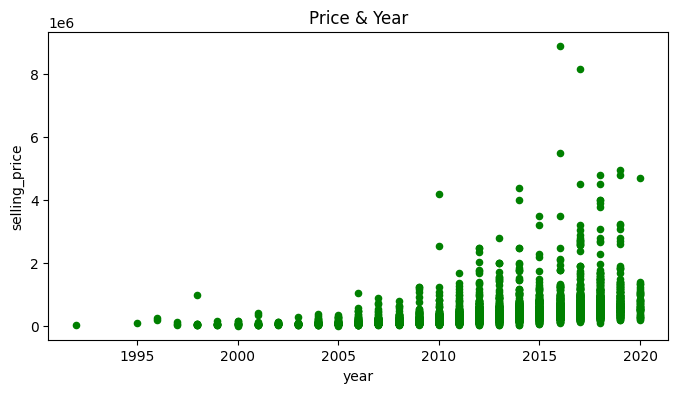

In [37]:
#We will display bar graphs scatter
df.plot(x="year", y="selling_price", kind="scatter", figsize=(8, 4), title="Price & Year", color="green");